# Handwritten digits classification using neural network

In [1]:
#import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset from keras 
(X_train , Y_train ) , (X_test , Y_test ) = keras.datasets.mnist.load_data()

In [3]:
#nbr of sample
len(X_train)

60000

In [4]:
#nbr for test
len(X_test)

10000

In [5]:
#dimension of 1 sample ( image)
X_train[0].shape

(28, 28)

In [6]:
#2D array of first sample  (daata)
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

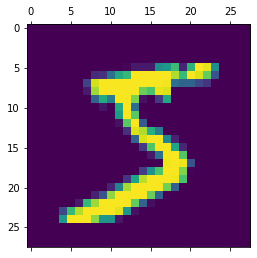

In [7]:
#how it realy looks !
plt.matshow(X_train[0])

In [8]:
#Y_train must be the target (the number associated with this image, it's a digit from 0--9)
Y_train[0]

5

In [9]:
#convert 2D array to 1D array (because we assume that every pixel will be a feature (input neuron)) 
#operation is called flatten an array
# from 28*28 2D array to 784*1 1D array

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
#scale values ! from 0--255  to 0--1
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train_flattened = X_train.reshape(60000,28*28)
X_test_flattened = X_test.reshape(10000,28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened.shape

(10000, 784)

In [15]:
#it becomes a 1D array
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<img src="digits_nn.jpg" />

# a simple neural network which has only input and output layers

In [16]:
#create simple Neural Network
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#epochs nmbr of training 
model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 2ms/step - loss: 0.4693 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9255


In [17]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2686 - accuracy: 0.9258


[0.2686006724834442, 0.9258000254631042]

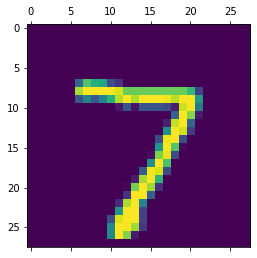

In [18]:
plt.matshow(X_test[0])

In [19]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.7005851e-02, 2.0280764e-07, 4.0394694e-02, 9.5531023e-01,
       1.9285679e-03, 1.0954541e-01, 1.0871493e-06, 9.9980509e-01,
       9.3240738e-02, 6.6268951e-01], dtype=float32)

In [20]:
np.argmax(y_predicted[0])

7

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [22]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
#create confusion_matrix  
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    5,    2,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [  10,    6,  929,   11,    7,    4,   11,   11,   38,    5],
       [   6,    0,   23,  890,    0,   44,    2,   14,   24,    7],
       [   2,    1,    4,    2,  914,    0,    8,    5,   10,   36],
       [  11,    2,    6,   15,    8,  797,    8,    8,   29,    8],
       [  14,    3,    7,    1,    8,   23,  898,    2,    2,    0],
       [   2,    5,   22,    3,    3,    0,    0,  962,    2,   29],
       [   8,    6,    7,   15,    9,   29,    8,   13,  871,    8],
       [  11,    7,    1,    7,   22,    8,    0,   28,    4,  921]])>

Text(69.0, 0.5, 'Truth')

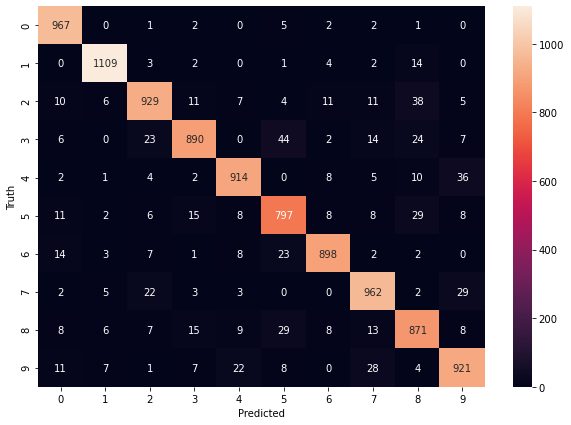

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using hidden layer

In [26]:
#we use hidden layer to improve model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 0.2690 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1174 - accuracy: 0.9654
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0832 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0638 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0502 - accuracy: 0.9844


In [28]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0807 - accuracy: 0.9751


[0.08069193363189697, 0.9750999808311462]

Text(69.0, 0.5, 'Truth')

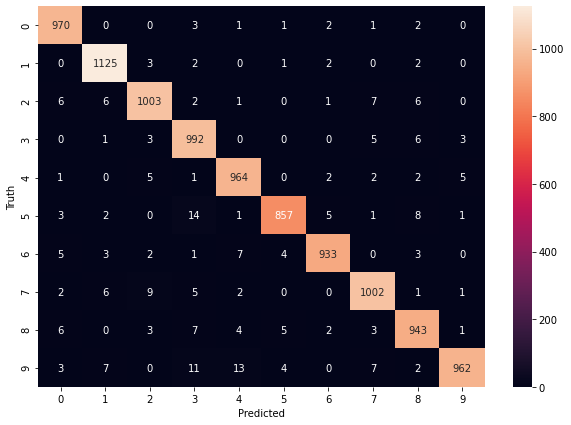

In [30]:

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Flatten layer so that we don't have to call .reshape on input dataset

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2711 - accuracy: 0.9239
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1227 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0845 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0641 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0507 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0399 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0330 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0269 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0222 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.018

In [33]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 3s 2ms/step - loss: 0.0775 - accuracy: 0.9770


[0.07751686125993729, 0.9769999980926514]